In [1]:
import pandas as pd
import numpy as np
from time import time
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
plt.style.use("ggplot")

In [4]:
def pool(X, input_shape=28, output_shape=14, pool_type="avg"):
    
    scaled_images = []
    in_sh = input_shape
    out_sh = output_shape
    bin_size = in_sh // out_sh
    for img in X:
        img = img.reshape(in_sh, in_sh).reshape((out_sh, bin_size, out_sh, bin_size))
        if pool_type == "max":
            img = img.max(3).max(1)
        elif pool_type == "avg":
            img = img.mean(3).mean(1)
        scaled_images.append(img.flatten())
    return np.array(scaled_images)

In [5]:
accuracies = []
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [6]:
y_train = np.array(train_data["label"])
y_test = np.array(test_data["label"])
x_train = np.array(train_data.drop("label", axis=1))
x_test = np.array(test_data.drop("label", axis=1))

In [7]:
pool_type = "max"
x_train = pool(x_train, pool_type=pool_type)
x_test = pool(x_test, pool_type=pool_type)

In [8]:
# Logistic Regression
now = time()
classifier = LogisticRegression(n_jobs=-1, verbose=0, max_iter=500) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred), 3)
accuracies.append(acc)
print("latest Logistic Regression Accuracy: {}".format(acc))
print("time: {} s".format(time() - now))

latest Logistic Regression Accuracy: 0.918
time: 128.70514845848083 s


In [9]:
# Support Vector Machine
now = time()
classifier = SVC(degree=2, kernel="rbf", verbose=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred), 3)
accuracies.append(acc)
print("latest Support Vector Machine Accuracy: {}".format(acc))
print("time: {} s".format(time() - now))

latest Support Vector Machine Accuracy: 0.976
time: 303.2920162677765 s


In [10]:
# Decision Tree
now = time()
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred), 3)
accuracies.append(acc)
print("latest Decision Tree Accuracy: {}".format(acc))
print("time: {} s".format(time() - now))

latest Decision Tree Accuracy: 0.89
time: 10.80811619758606 s


In [11]:
#XGBoost
now = time()
classifier = XGBClassifier() 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred), 3)
accuracies.append(acc)
print("latest XGBoost Accuracy: {}".format(acc))
print("time: {} s".format(time() - now))

latest XGBoost Accuracy: 0.976
time: 377.8334879875183 s


In [12]:
# Random Forest
now = time()
classifier = RandomForestClassifier(n_jobs=-1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred), 3)
accuracies.append(acc)
print("latest Random Forest Accuracy: {}".format(acc))
print("time: {} s".format(time() - now))

latest Random Forest Accuracy: 0.967
time: 22.896360635757446 s


In [13]:
# K-nearest neighbours
now = time()
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred), 3)
accuracies.append(acc)
print("latest K-Nearest Neighbor Accuracy: {}".format(acc))
print("time: {} s".format(time() - now))

latest K-Nearest Neighbor Accuracy: 0.967
time: 183.01194882392883 s


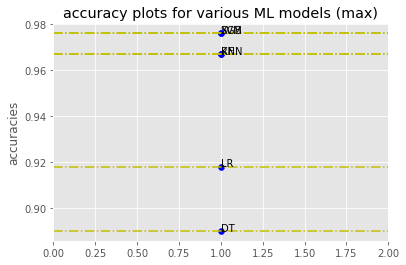

In [14]:
plt.xlim(0, 2)
plt.ylabel("accuracies")
plt.title("accuracy plots for various ML models ({})".format(pool_type))
labels = ["LR", "SVM", "DT", "XGB", "RF", "KNN"]
for (y, label) in zip(accuracies, labels):
    plt.scatter(1, y, marker='o', color='b')
    plt.axhline(y=y, color='y', linestyle="-.")
    plt.annotate(label, (1, y))
plt.show()